In [1]:
from crop import *
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import mediapipe as mp
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LayerNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [2]:
#first crop the viedos
#train test split
#preprocess the data
def extract_keypoints(results):
    pose = np.array([[res.x, res.y] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*2)

    lh = np.array([[res.x, res.y] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*2)

    rh = np.array([[res.x, res.y] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*2)

    return np.concatenate([pose, lh, rh])

def extract_video_keypoints(results):
    data = []
    for r in results:
        keypoints = extract_keypoints(r)
        data.append(keypoints)
    return np.array(data)

In [11]:
video_path = "../demodata/data"
directories = os.listdir(video_path)
frames = []
data = []
labels = []
for d in directories:
    print("Executing {0} signs".format(d))
    files = os.listdir(video_path+"/"+d)
    for f in files:
        print("Executing the video named {0}".format(f))
        file_path = video_path + "/" + d + "/"+ f
        original_frames, cropped_frames ,detection_results = crop_video(file_path, 400)
        keypoints = extract_video_keypoints(detection_results)
        data.append(keypoints)
        labels.append(d)
        frames.append(cropped_frames)


Executing 1 signs
Executing the video named signer0_sample109_color.mp4
Executing the video named signer0_sample1271_color.mp4
Executing the video named signer0_sample25_color.mp4
Executing the video named signer0_sample276_color.mp4
Executing the video named signer0_sample453_color.mp4
Executing the video named signer0_sample617_color.mp4
Executing the video named signer10_sample216_color.mp4
Executing the video named signer10_sample289_color.mp4
Executing the video named signer10_sample9_color.mp4
Executing the video named signer19_sample293_color.mp4
Executing the video named signer19_sample443_color.mp4
Executing the video named signer19_sample493_color.mp4
Executing the video named signer20_sample283_color.mp4
Executing the video named signer20_sample372_color.mp4
Executing the video named signer20_sample535_color.mp4
Executing the video named signer21_sample125_color.mp4
Executing the video named signer21_sample159_color.mp4
Executing the video named signer22_sample367_color.mp4


Executing the video named signer42_sample581_color.mp4
Executing the video named signer4_sample236_color.mp4
Executing the video named signer4_sample532_color.mp4
Executing the video named signer4_sample69_color.mp4
Executing the video named signer5_sample504_color.mp4
Executing the video named signer5_sample587_color.mp4
Executing the video named signer5_sample598_color.mp4
Executing the video named signer7_sample1549_color.mp4
Executing the video named signer7_sample1815_color.mp4
Executing the video named signer7_sample2333_color.mp4
Executing the video named signer8_sample1546_color.mp4
Executing the video named signer8_sample894_color.mp4
Executing the video named signer8_sample920_color.mp4
Executing the video named signer9_sample201_color.mp4
Executing the video named signer9_sample341_color.mp4
Executing the video named signer9_sample437_color.mp4
Executing 2 signs
Executing the video named signer0_sample1019_color.mp4
Executing the video named signer0_sample1223_color.mp4
Exec

Executing the video named signer37_sample365_color.mp4
Executing the video named signer37_sample51_color.mp4
Executing the video named signer38_sample362_color.mp4
Executing the video named signer38_sample387_color.mp4
Executing the video named signer38_sample633_color.mp4
Executing the video named signer3_sample128_color.mp4
Executing the video named signer3_sample173_color.mp4
Executing the video named signer3_sample415_color.mp4
Executing the video named signer40_sample3_color.mp4
Executing the video named signer40_sample412_color.mp4
Executing the video named signer40_sample43_color.mp4
Executing the video named signer41_sample266_color.mp4
Executing the video named signer41_sample620_color.mp4
Executing the video named signer41_sample629_color.mp4
Executing the video named signer42_sample179_color.mp4
Executing the video named signer42_sample37_color.mp4
Executing the video named signer42_sample636_color.mp4
Executing the video named signer4_sample115_color.mp4
Executing the video

Executing the video named signer29_sample138_color.mp4
Executing the video named signer29_sample247_color.mp4
Executing the video named signer29_sample36_color.mp4
Executing the video named signer2_sample1100_color.mp4
Executing the video named signer2_sample750_color.mp4
Executing the video named signer2_sample757_color.mp4
Executing the video named signer2_sample786_color.mp4
Executing the video named signer2_sample871_color.mp4
Executing the video named signer2_sample887_color.mp4
Executing the video named signer31_sample343_color.mp4
Executing the video named signer31_sample463_color.mp4
Executing the video named signer31_sample564_color.mp4
Executing the video named signer32_sample175_color.mp4
Executing the video named signer32_sample429_color.mp4
Executing the video named signer33_sample238_color.mp4
Executing the video named signer33_sample461_color.mp4
Executing the video named signer33_sample465_color.mp4
Executing the video named signer36_sample176_color.mp4
Executing the vi

Executing the video named signer20_sample441_color.mp4
Executing the video named signer21_sample119_color.mp4
Executing the video named signer21_sample25_color.mp4
Executing the video named signer22_sample115_color.mp4
Executing the video named signer22_sample46_color.mp4
Executing the video named signer23_sample226_color.mp4
Executing the video named signer23_sample246_color.mp4
Executing the video named signer23_sample408_color.mp4
Executing the video named signer24_sample160_color.mp4
Executing the video named signer24_sample199_color.mp4
Executing the video named signer24_sample225_color.mp4
Executing the video named signer26_sample377_color.mp4
Executing the video named signer26_sample482_color.mp4
Executing the video named signer26_sample516_color.mp4
Executing the video named signer28_sample268_color.mp4
Executing the video named signer28_sample501_color.mp4
Executing the video named signer29_sample208_color.mp4
Executing the video named signer29_sample319_color.mp4
Executing th

Executing the video named signer9_sample146_color.mp4
Executing the video named signer9_sample270_color.mp4
Executing the video named signer9_sample655_color.mp4
Executing 9 signs
Executing the video named signer0_sample1089_color.mp4
Executing the video named signer0_sample1114_color.mp4
Executing the video named signer0_sample1141_color.mp4
Executing the video named signer0_sample193_color.mp4
Executing the video named signer0_sample472_color.mp4
Executing the video named signer0_sample474_color.mp4
Executing the video named signer10_sample175_color.mp4
Executing the video named signer10_sample251_color.mp4
Executing the video named signer10_sample636_color.mp4
Executing the video named signer19_sample120_color.mp4
Executing the video named signer19_sample511_color.mp4
Executing the video named signer20_sample102_color.mp4
Executing the video named signer20_sample570_color.mp4
Executing the video named signer20_sample655_color.mp4
Executing the video named signer21_sample33_color.mp4

In [28]:
# np.save("data", np.array(data, dtype="object"))
# np.save("labels", np.array(labels))


In [3]:
data = np.load("data.npy", allow_pickle=True)
labels = np.load("labels.npy")

In [8]:
data[0].shape

(52, 150)

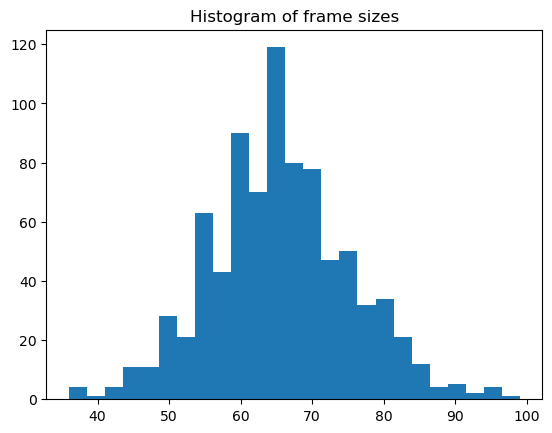

In [9]:
import matplotlib.pyplot as plt
frame_sizes = []
for d in data:
    frame_sizes.append(d.shape[0])

    
_ = plt.hist(np.array(frame_sizes), bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of frame sizes")
plt.show()

In [16]:
def optimize_keypoints_size(keypoints, size):
    if keypoints.shape[0] ==size:
        return keypoints
    
    if keypoints.shape[0] < size:
        missing_frames_size = size- keypoints.shape[0]
        original_indices = np.array([i for i in range(len(keypoints))])
        indices_to_duplicate = np.linspace(0, keypoints.shape[0] - 1, missing_frames_size, dtype=int)
        all_indices = np.sort(np.concatenate((original_indices, indices_to_duplicate), axis=0))
        return keypoints[all_indices]


    if keypoints.shape[0] > size:
        # Delete frames based on a pattern to match the desired size
        indices_to_keep = np.linspace(0, keypoints.shape[0] - 1, size, dtype=int)
        return keypoints[indices_to_keep]

def optimize_data(size):
    optimized_data = []
    for d in data:
        optimized_keypoints = optimize_keypoints_size(d, size)
        optimized_data.append(optimized_keypoints)
    return np.array(optimized_data)

In [32]:
size=60
optimized_data = optimize_data(size)
X = np.copy(optimized_data)
y = to_categorical(np.array(labels, dtype="int")-1).astype(int)

In [33]:
indices = np.arange(len(labels))
np.random.shuffle(indices)

X_shuffled = optimized_data[indices]
y_shuffled = y[indices]

In [19]:
actions = ["acele", "acikmak", "afiyet olsun", "agabey", "agac", "agir", "aglamak", "aile", "akilli", "akilsiz"]
label_map = {label: num for num, label in enumerate(actions)}

In [20]:
label_map

{'acele': 0,
 'acikmak': 1,
 'afiyet olsun': 2,
 'agabey': 3,
 'agac': 4,
 'agir': 5,
 'aglamak': 6,
 'aile': 7,
 'akilli': 8,
 'akilsiz': 9}

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2)

In [36]:
for t in y_test:
    print(np.argmax(t))

9
4
6
3
3
0
8
4
5
9
6
3
2
4
2
4
3
9
2
7
2
6
5
1
8
3
4
3
6
0
9
3
7
5
7
2
6
1
0
9
9
3
4
4
4
8
0
6
8
2
7
8
3
3
0
3
5
8
0
2
4
3
3
7
6
6
1
7
4
5
0
2
8
4
4
5
7
9
1
6
0
9
5
7
6
8
0
6
1
0
8
6
2
1
0
5
1
9
6
7
5
8
4
2
5
1
3
1
0
7
7
1
3
4
2
9
3
9
3
0
2
1
7
4
1
3
4
9
9
6
1
0
8
6
1
4
2
2
2
3
6
6
5
7
4
4
8
5
9
8
1
2
9
5
9
1
1
5
7
3
8
4
7
8
9
1
0


In [37]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [39]:
def train_model(X_train, y_train, epoch_no, label_no):
    model = Sequential()
    model.add(LSTM(32, return_sequences=True, activation='relu', input_shape=(60,150)))
    model.add(LSTM(16, return_sequences=False, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(label_no, activation='softmax'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    model.fit(X_train, y_train, epochs=epoch_no, callbacks=[tb_callback])
    model.summary()
    return model

In [44]:
model1 = train_model(X_train, y_train, 300, 10)

Epoch 1/300
21/21 [==============================] - 5s 24ms/step - loss: 2.3083 - categorical_accuracy: 0.0958
Epoch 2/300
21/21 [==============================] - 0s 23ms/step - loss: 2.3049 - categorical_accuracy: 0.0808
Epoch 3/300
21/21 [==============================] - 0s 24ms/step - loss: 2.3011 - categorical_accuracy: 0.1108
Epoch 4/300
21/21 [==============================] - 0s 24ms/step - loss: 2.3021 - categorical_accuracy: 0.0928
Epoch 5/300
21/21 [==============================] - 0s 23ms/step - loss: 2.3030 - categorical_accuracy: 0.0958
Epoch 6/300
21/21 [==============================] - 0s 23ms/step - loss: 2.3008 - categorical_accuracy: 0.1153
Epoch 7/300
21/21 [==============================] - 0s 23ms/step - loss: 2.3006 - categorical_accuracy: 0.1138
Epoch 8/300
21/21 [==============================] - 1s 26ms/step - loss: 2.3007 - categorical_accuracy: 0.1287
Epoch 9/300
21/21 [==============================] - 1s 30ms/step - loss: 2.3001 - categorical_accuracy:

21/21 [==============================] - 1s 27ms/step - loss: 0.3808 - categorical_accuracy: 0.8428
Epoch 74/300
21/21 [==============================] - 1s 31ms/step - loss: 0.4046 - categorical_accuracy: 0.8293
Epoch 75/300
21/21 [==============================] - 1s 34ms/step - loss: 0.4120 - categorical_accuracy: 0.8249
Epoch 76/300
21/21 [==============================] - 1s 34ms/step - loss: 0.4074 - categorical_accuracy: 0.8458
Epoch 77/300
21/21 [==============================] - 1s 31ms/step - loss: 0.4408 - categorical_accuracy: 0.8338
Epoch 78/300
21/21 [==============================] - 1s 29ms/step - loss: 0.3359 - categorical_accuracy: 0.8638
Epoch 79/300
21/21 [==============================] - 1s 30ms/step - loss: 0.3258 - categorical_accuracy: 0.8728
Epoch 80/300
21/21 [==============================] - 1s 31ms/step - loss: 0.3582 - categorical_accuracy: 0.8548
Epoch 81/300
21/21 [==============================] - 1s 30ms/step - loss: 0.3446 - categorical_accuracy: 0.8

21/21 [==============================] - 1s 29ms/step - loss: 0.1378 - categorical_accuracy: 0.9416
Epoch 146/300
21/21 [==============================] - 1s 29ms/step - loss: 0.1882 - categorical_accuracy: 0.9311
Epoch 147/300
21/21 [==============================] - 1s 31ms/step - loss: 0.5226 - categorical_accuracy: 0.8518
Epoch 148/300
21/21 [==============================] - 1s 29ms/step - loss: 0.4222 - categorical_accuracy: 0.8548
Epoch 149/300
21/21 [==============================] - 1s 29ms/step - loss: 0.3156 - categorical_accuracy: 0.8892
Epoch 150/300
21/21 [==============================] - 1s 31ms/step - loss: 0.2291 - categorical_accuracy: 0.8997
Epoch 151/300
21/21 [==============================] - 1s 29ms/step - loss: 0.1943 - categorical_accuracy: 0.9251
Epoch 152/300
21/21 [==============================] - 1s 29ms/step - loss: 0.2166 - categorical_accuracy: 0.9192
Epoch 153/300
21/21 [==============================] - 1s 29ms/step - loss: 0.1685 - categorical_accur

Epoch 217/300
21/21 [==============================] - 1s 28ms/step - loss: 0.2208 - categorical_accuracy: 0.9237
Epoch 218/300
21/21 [==============================] - 1s 29ms/step - loss: 0.1513 - categorical_accuracy: 0.9401
Epoch 219/300
21/21 [==============================] - 1s 29ms/step - loss: 0.1534 - categorical_accuracy: 0.9431
Epoch 220/300
21/21 [==============================] - 1s 29ms/step - loss: 0.1164 - categorical_accuracy: 0.9521
Epoch 221/300
21/21 [==============================] - 1s 29ms/step - loss: 0.0796 - categorical_accuracy: 0.9731
Epoch 222/300
21/21 [==============================] - 1s 29ms/step - loss: 0.0666 - categorical_accuracy: 0.9775
Epoch 223/300
21/21 [==============================] - 1s 28ms/step - loss: 0.0672 - categorical_accuracy: 0.9716
Epoch 224/300
21/21 [==============================] - 1s 30ms/step - loss: 0.0963 - categorical_accuracy: 0.9626
Epoch 225/300
21/21 [==============================] - 1s 33ms/step - loss: 0.1414 - cat

21/21 [==============================] - 1s 30ms/step - loss: 0.0657 - categorical_accuracy: 0.9731
Epoch 289/300
21/21 [==============================] - 1s 29ms/step - loss: 0.1177 - categorical_accuracy: 0.9581
Epoch 290/300
21/21 [==============================] - 1s 32ms/step - loss: 0.1147 - categorical_accuracy: 0.9581
Epoch 291/300
21/21 [==============================] - 1s 36ms/step - loss: 0.1865 - categorical_accuracy: 0.9386
Epoch 292/300
21/21 [==============================] - 1s 34ms/step - loss: 0.1149 - categorical_accuracy: 0.9566
Epoch 293/300
21/21 [==============================] - 1s 32ms/step - loss: 0.0639 - categorical_accuracy: 0.9731
Epoch 294/300
21/21 [==============================] - 1s 30ms/step - loss: 0.0718 - categorical_accuracy: 0.9760
Epoch 295/300
21/21 [==============================] - 1s 30ms/step - loss: 0.0331 - categorical_accuracy: 0.9970
Epoch 296/300
21/21 [==============================] - 1s 30ms/step - loss: 0.0257 - categorical_accur

In [45]:
y_pred = model1.predict(X_test)

6/6 [==============================] - 0s 8ms/step


In [46]:
y_predicted = np.argmax(y_pred, axis=1).tolist()
y_true = np.argmax(y_test, axis=1).tolist()

In [47]:
accuracy = accuracy_score(y_true, y_predicted)
accuracy

0.8922155688622755

In [48]:
#model1.save('model_99acc.h5')

C:\Users\smurf\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
def train_model2(X_train, y_train, epoch_no, label_no):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(60,150)))
    model.add(LSTM(64, return_sequences=False, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(label_no, activation='softmax'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    model.fit(X_train, y_train, epochs=epoch_no, callbacks=[tb_callback])
    model.summary()
    return model


model2 = train_model2(X_train, y_train, 100, 10)



Epoch 1/100


21/21 [==============================] - 5s 46ms/step - loss: 2.3164 - categorical_accuracy: 0.1228
Epoch 2/100
21/21 [==============================] - 1s 45ms/step - loss: 2.3055 - categorical_accuracy: 0.0913
Epoch 3/100
21/21 [==============================] - 1s 46ms/step - loss: 2.2957 - categorical_accuracy: 0.1183
Epoch 4/100
21/21 [==============================] - 1s 45ms/step - loss: 2.3380 - categorical_accuracy: 0.1302
Epoch 5/100
21/21 [==============================] - 1s 44ms/step - loss: 2.3170 - categorical_accuracy: 0.1003
Epoch 6/100
21/21 [==============================] - 1s 50ms/step - loss: 2.3037 - categorical_accuracy: 0.1183
Epoch 7/100
21/21 [==============================] - 1s 44ms/step - loss: 2.3279 - categorical_accuracy: 0.1018
Epoch 8/100
21/21 [==============================] - 1s 45ms/step - loss: 2.3043 - categorical_accuracy: 0.1078
Epoch 9/100
21/21 [==============================] - 1s 43ms/step - loss: 2.3020 - categorical_accur

In [14]:
y_pred = model2.predict(X_test)


6/6 [==============================] - 1s 18ms/step


In [15]:
y_pred = model2.predict(X_test)
y_predicted = np.argmax(y_pred, axis=1).tolist()
y_true = np.argmax(y_test, axis=1).tolist()
accuracy = accuracy_score(y_true, y_predicted)

In [16]:
accuracy

0.8323353293413174

In [17]:
#model2.save('model2.h5')

C:\Users\smurf\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
model2 = load_model("model2.h5")
y_pred = model2.predict(X_test)
y_predicted = np.argmax(y_pred, axis=1).tolist()
y_true = np.argmax(y_test, axis=1).tolist()
accuracy = accuracy_score(y_true, y_predicted)


6/6 [==============================] - 1s 18ms/step


In [14]:
accuracy

0.9281437125748503

In [65]:
mp_pose = mp.solutions.pose
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

def detect_landmarks(image_, model):
    image_.flags.writeable = False
    image_ = cv2.cvtColor(image_, cv2.COLOR_BGR2RGB)
    results_ = model.process(image_)
    image_.flags.writeable = True
    image_ = cv2.cvtColor(image_, cv2.COLOR_RGB2BGR)
    return image_, results_

def draw_landmarks(image_, results_):
    mp_drawing.draw_landmarks(
            image_,
            results_.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color =(255,0,0), thickness =1 ,circle_radius = 1),
            mp_drawing.DrawingSpec(color =(80,256,121), thickness =1 ,circle_radius = 1))
    mp_drawing.draw_landmarks(
            image_,
            results_.right_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color =(255,0,0), thickness =1 ,circle_radius = 1),
            mp_drawing.DrawingSpec(color =(80,256,121), thickness =1 ,circle_radius = 1))
        
    mp_drawing.draw_landmarks(
            image_,
            results_.left_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color =(255,0,0), thickness =1 ,circle_radius = 1),
            mp_drawing.DrawingSpec(color =(80,256,121), thickness =1 ,circle_radius = 1))



def pose_detection(frames):
    detection_results = []
    with mp_holistic.Holistic(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as holistic:
        for image in frames:
            image, results = detect_landmarks(image, holistic) 

            detection_results.append(results)
    return detection_results

def show_landmarks(original_image,results):
    fig = plt.figure(figsize=(12, 9)) 
    fig.add_subplot(1, 2, 1) 
    plt.title("Original Image")
    
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    fig.add_subplot(1, 2, 2) 
    plt.title("Keypoints")
    cropped_image_cp = original_image.copy()
    draw_landmarks(cropped_image_cp,results)
    plt.imshow( cv2.cvtColor(cropped_image_cp, cv2.COLOR_BGR2RGB))
    plt.show() 
    
def extract_video(path):
    cap = cv2.VideoCapture(path)
    original_frames =[]
    frames = []
    with mp_holistic.Holistic(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():
            success, image = cap.read()
            if not success:
                break
            if not success:
                break
            image, results = detect_landmarks(image, holistic) 
            frames.append(image)
            
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
    
    cap.release()
    cv2.destroyAllWindows()
    detection_results = pose_detection(frames) 
    return frames, detection_results

In [66]:
actions = ["acele", "acikmak", "afiyet olsun", "agabey", "agac", "agir", "aglamak", "aile", "akilli", "akilsiz"]
model2 = load_model("model2.h5")

In [79]:


frames, detection_results = extract_video("../demodata/livedemo/afied4.webm")
keypoints = extract_video_keypoints(detection_results)
keypoints_optimized =optimize_keypoints_size(np.array(keypoints), 60)
y_pred = model2.predict(np.array([keypoints_optimized]))
y_predicted = np.argmax(y_pred, axis=1).tolist()
actions[y_predicted[0]]

1/1 [==============================] - 0s 30ms/step


'agabey'

In [80]:
len(frames)

37

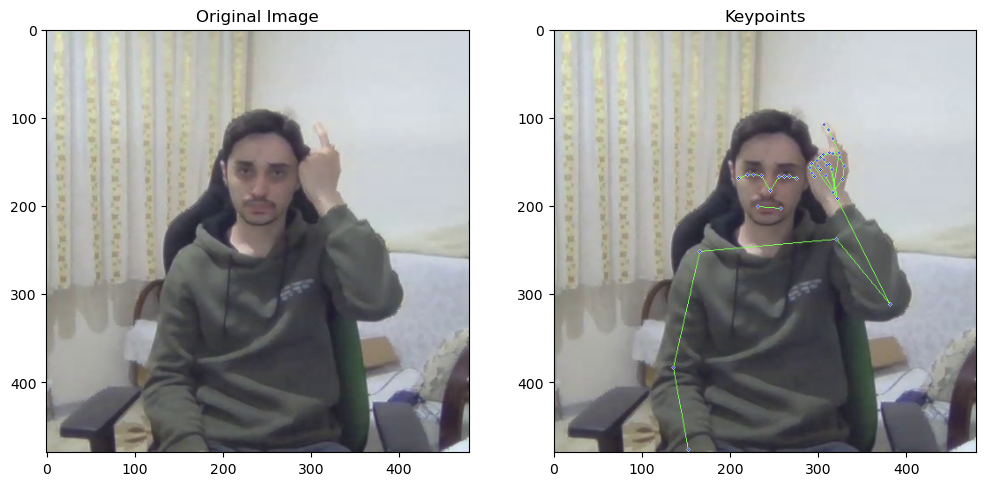

In [47]:
show_landmarks(frames[30], detection_results[30])

In [43]:
actions = ["acele", "acikmak", "afiyet olsun", "agabey", "agac", "agir", "aglamak", "aile", "akilli", "akilsiz"]
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

# 1. New detection variables
frames =[]
sequence = []
sentence = []
threshold = 0.90

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW) # this is the magic!

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 720)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)
cap.set(cv2.CAP_PROP_FPS, 30)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        print(frame.shape)
        # Make detections
        image, results = detect_landmarks(frame, holistic)
        
        frames.append(frame)
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]

        sequence.append(keypoints)
        sequence = sequence[-60:]
        frames = frames[-60:]
        if len(frames) == 60:
            res = model2.predict(np.expand_dims(sequence, axis=0))[0]
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 3: 
                sentence = sentence[-3:]

            # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (400, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 28ms/step


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


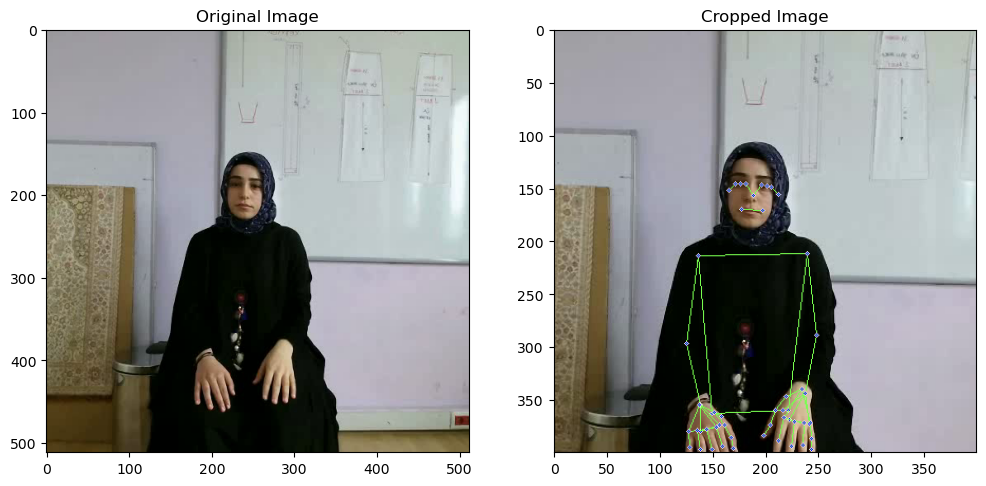

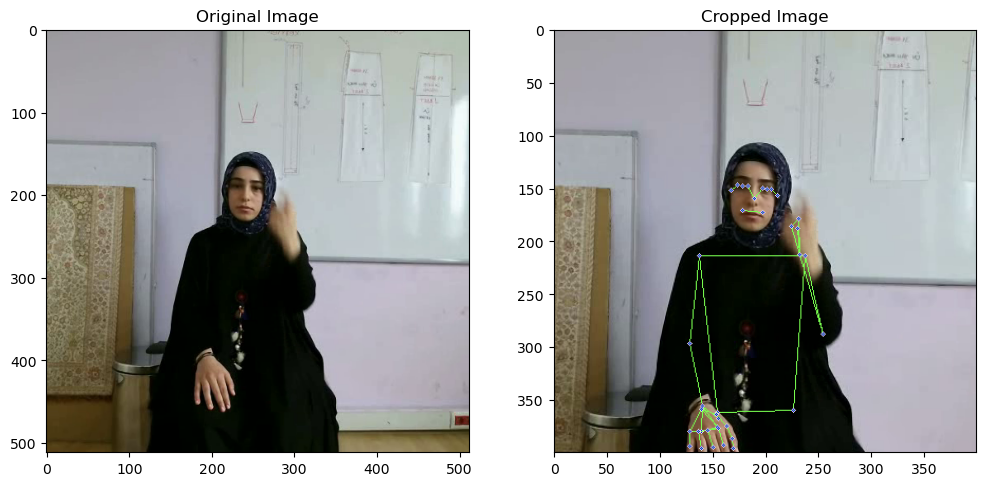

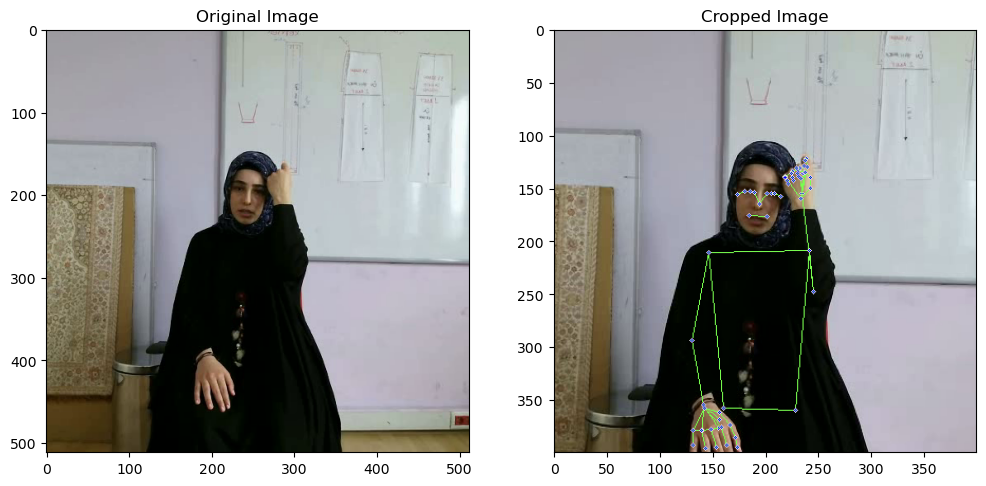

In [238]:
video_path = "../demodata/data"
original_frames, cropped_frames ,detection_results = crop_video(video_path+"/10/signer33_sample137_color.mp4", 400)
show_original_and_cropped_image(original_frames[0], cropped_frames[0], detection_results[0])
show_original_and_cropped_image(original_frames[10], cropped_frames[10], detection_results[10])
show_original_and_cropped_image(original_frames[20], cropped_frames[20], detection_results[20])

In [40]:
for i in

500

In [237]:
len(cropped_frames)

54